Project Name: Electric Car prediction

Author: A. Nikfarjam

Discription: In this project I am using KNeighborsRegressor Model and SciKit Learn to predict the population of electric cars.

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

The Data set comes from:https://catalog.data.gov/dataset/electric-vehicle-population-size-history-by-county

In [106]:
#data prep and importing libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd 

# Load the data
data = pd.read_csv("Electric_Vehicle_Population_Size_History_By_County.csv")
print("df size:",data.shape)
#lets get some ingfo about our data
data.info()



df size: (20493, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20493 entries, 0 to 20492
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20493 non-null  object 
 1   County                                    20408 non-null  object 
 2   State                                     20408 non-null  object 
 3   Vehicle Primary Use                       20493 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20493 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20493 non-null  int64  
 6   Electric Vehicle (EV) Total               20493 non-null  int64  
 7   Non-Electric Vehicle Total                20493 non-null  int64  
 8   Total Vehicles                            20493 non-null  int64  
 9   Percent Electric Vehicles                 20493 non-null  float64
dtypes: float64(1)

now i know what columns are in our data set and what data type there are

to prep the data and do analysis I am thinking about and aggregate the Plug-In Hybrid Electric Vehicles (PHEVs) and Electric Vehicle (EV) Total and  Non-Electric Vehicle Total  and Total vehicles columns


In [107]:
#data = data.groupby('Date').agg({
#    col: 'sum' for col in data.columns[4:9]
#}).reset_index()
#print("df size:",data.shape)
#data.head(20)

As we can see in the first pary it seams like, out data frame doesnt have non filled data

1- In this part I am going to Identify the features and targey variables
2- we need to split our data frame for training and testing
3- then run the the module on out test data set

In [108]:
# Split the features and target variable
#cp_df = data.copy()
X = data.drop('Electric Vehicle (EV) Total', axis=1)
y = data['Electric Vehicle (EV) Total']  

# Dummy encoding for categorical variables on combined dataset
X_encoded = pd.get_dummies(X, columns=['Date','County','State','Vehicle Primary Use'])
X_encoded.head()


,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Date_April 30 2017,Date_April 30 2018,Date_April 30 2019,Date_April 30 2020,Date_April 30 2021,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WY,Vehicle Primary Use_Passenger,Vehicle Primary Use_Truck
0,8,0,28276,28284,0.03,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,0,0,8586,8586,0.00,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,1,2,136,139,2.16,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,0,21265,21265,0.00,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,3,2,527,532,0.94,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [109]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Instantiate the KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2)

# Fit the model
reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = reg.predict(X_test)

#lets see out perdictions
print("This is the 10 examples of perdictions made during trainings",[x for x in y_pred if x > 0][:10])
print("This is the 10 examples of perdictions made during testing",[x for x in y_test if x > 0][:10])

This is the 10 examples of perdictions made during trainings [2.0, 2.0, 1.0, 310.5, 2666.5, 1.0, 7.0, 2.0, 8.5, 10.0]
This is the 10 examples of perdictions made during testing [2, 2, 1, 303, 29, 2544, 1, 8, 2, 7]


this a pick at Xtest

In [110]:
X_test.head()

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Date_April 30 2017,Date_April 30 2018,Date_April 30 2019,Date_April 30 2020,Date_April 30 2021,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WY,Vehicle Primary Use_Passenger,Vehicle Primary Use_Truck
18677,1,1,82,84,2.38,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14920,1,1,208,210,0.95,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19099,0,1,12,13,7.69,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2450,155,148,128660,128963,0.23,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
960,25,4,4128,4157,0.70,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [111]:
#add the predicrions column in to the data frame
X_test['Electric Vehicle (EV) Total']=y_test
predicted_ev = []#bater electric vehicles
dates = []
for date in X_test.columns[4:]:
    true_row = X_test[date].idxmax()
    predicted_ev.append(X_test.loc[true_row, 'Electric Vehicle (EV) Total'])
    dates.append(date)
print(dates[:10])
print(predicted_ev[:10])

    

['Percent Electric Vehicles', 'Date_April 30 2017', 'Date_April 30 2018', 'Date_April 30 2019', 'Date_April 30 2020', 'Date_April 30 2021', 'Date_April 30 2022', 'Date_April 30 2023', 'Date_August 31 2017', 'Date_August 31 2018']
[1, 1, 0, 0, 0, 2544, 1, 1, 1, 0]


Now we construct  a data frame from the lists we created

In [112]:
prd_df = pd.DataFrame({'Date': dates,
                       'Predicted_EV_counts':predicted_ev
                       })
print(prd_df.shape)
prd_df.head()

(449, 2)


,Date,Predicted_EV_counts
0,Percent Electric Vehicles,1
1,Date_April 30 2017,1
2,Date_April 30 2018,0
3,Date_April 30 2019,0
4,Date_April 30 2020,0


The last step is to merge this data frame with the original one

to make this happened i need to drop "Date_" part from the values of the Date column

In [113]:
prd_df['Date'] = prd_df['Date'].str.split("_").str[1]

# Merging the dataframes
merged_df = pd.merge(data, prd_df, on='Date', how='left')

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)

# Displaying the first few rows of the merged dataframe
print(merged_df.shape)
merged_df.head()

(20493, 11)


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Predicted_EV_counts
0,April 30 2023,Cowlitz,WA,Truck,8,0,8,28276,28284,0.03,1
1,June 30 2019,Whitman,WA,Truck,0,0,0,8586,8586,0.00,1
2,October 31 2022,Monterey,CA,Passenger,1,2,3,136,139,2.16,57246
3,August 31 2019,Island,WA,Truck,0,0,0,21265,21265,0.00,2
4,March 31 2023,El Paso,CO,Passenger,3,2,5,527,532,0.94,24


In [114]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20493 entries, 0 to 20492
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20493 non-null  object 
 1   County                                    20493 non-null  object 
 2   State                                     20493 non-null  object 
 3   Vehicle Primary Use                       20493 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20493 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20493 non-null  int64  
 6   Electric Vehicle (EV) Total               20493 non-null  int64  
 7   Non-Electric Vehicle Total                20493 non-null  int64  
 8   Total Vehicles                            20493 non-null  int64  
 9   Percent Electric Vehicles                 20493 non-null  float64
 10  Predicted_EV_counts               

In [115]:
merged_df = merged_df.groupby('Date', sort=True).agg({
    col: 'sum' for col in merged_df.columns[4:11]
}).reset_index()
print("df size:",merged_df.shape)
merged_df.head(20)

df size: (85, 8)


,Date,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Predicted_EV_counts
0,April 30 2017,15791,8120,23911,5930546,5954457,381.53,189
1,April 30 2018,20505,11290,31795,5999728,6031523,426.34,0
2,April 30 2019,30465,14947,45412,6101079,6146491,662.71,0
3,April 30 2020,40628,17111,57739,6145333,6203072,876.56,0
4,April 30 2021,51645,19822,71467,6203668,6275135,1466.86,671616
5,April 30 2022,70751,24470,95221,6132307,6227528,1572.66,279
6,April 30 2023,99813,30298,130111,6030125,6160236,1343.55,272
7,August 31 2017,17273,8967,26240,5941718,5967958,360.23,186
8,August 31 2018,23078,12712,35790,6047909,6083699,489.13,0
9,August 31 2019,33667,15882,49549,6146412,6195961,919.05,478


since data is in string for mat i can just drop the the month and day then sory and get cleaner data

In [116]:
#merged_df=merged_df.iloc[0:,:]
#merged_df['Date']=merged_df['Date'].str.split()[2]
print(merged_df.shape)
merged_df=merged_df.iloc[:84,:]
merged_df['Date']=merged_df['Date'].str.split().str[-1]
merged_df = merged_df.groupby('Date', sort=True).agg({
    col: 'sum' for col in merged_df.columns[3:11]
}).reset_index()
#rint("df size:",merged_df.shape)
merged_df.head(20)

(85, 8)


,Date,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Predicted_EV_counts
0,2017,304741,71350065,71654806,4430.68,72571
1,2018,416635,72357905,72774540,5661.90,121018
2,2019,577967,73548399,74126366,9217.00,1471174
3,2020,715799,73881568,74597367,11424.35,171801
4,2021,914810,74265902,75180712,18135.30,1364042
5,2022,1214840,73332726,74547566,17750.09,15811439
6,2023,1550312,66059741,67610053,15199.19,1029189
7,2024,169990,5824680,5994670,1352.85,7308


now we can see how well our model worked

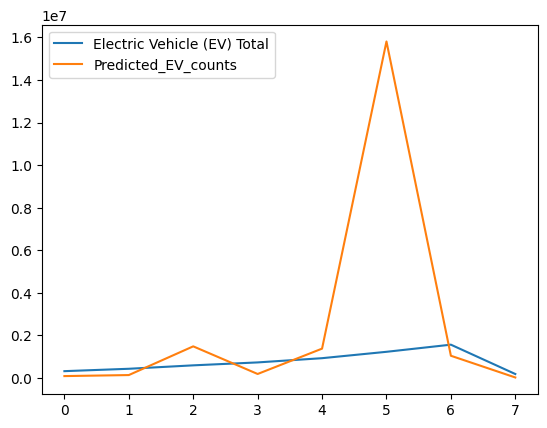

In [117]:
import matplotlib.pyplot as plt
plot_df = merged_df[['Date','Electric Vehicle (EV) Total','Predicted_EV_counts']]
line = plot_df.iloc[:,1:].plot.line()